<a href="https://colab.research.google.com/github/Abibsb/DSII_coderhouse/blob/main/DSII_Abigail_Stricker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo Final Data Science II
# Análisis de mercado de aplicaciones móviles - Variables determinantes de éxito económico.

Alumna: Abigail Stricker

Comisión: 61115


##Abstract
En el presente trabajo se buscó tener una comprensión integral del mercado de las aplicaciones móviles. Para ello se obtuvieron dos datasets libres de derechos con datos provenientes de las dos plataformas más utilizadas para la obtención de aplicaciones: Google Play Store y Apple AppStore. Ambos datasets fueron generados durante 2017. A pesar de la potencial obsolencia de estos datos debido al crecimiento exponencial del mercado, el trabajo generado puede adaptarse fácilmente a nuevos datasets generados.
A los datasets se los limpió y exploró para un uso futuro teniendo como objetivo final encontrar qué factores promueven descargas de apps y cuáles promueven las descargas de apps pagas.

---

##Definición y exploración de los datasets

Se utilizaron dos datasets, uno de la tienda de apps de Google y otro de la tienda de Apple. El dataset de Google fue obtenido por webscrapping en el 2017. Existe mayor información en el siguiente [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/data). En cambio, el dataset de Apple se obtuvo mediante la API de iTunes y webscrapping en el 2017 ([aquí](https://www.kaggle.com/datasets/ramamet4/app-store-apple-data-set-10k-apps?select=appleStore_description.csv) se puede encontrar más información).

Estos datasets se utilizaron como mercados mutuamente excluyentes, aunque se mantuvieron las mismas preguntas e hipótesis en ambas.

In [1]:
#Carga de bibliotecas a utilizar
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
#Cargas de datasets
google = pd.read_csv('/content/googleplaystore.csv')
apple = pd.read_csv('/content/AppleStore.csv')

###Google Play Store

In [3]:
#Exploracion de forma del dataset
print("Play Store dimensiones")
print(google.shape)
print("Play Store info")
google.info()
print("Play Store filas")
google.head()

Play Store dimensiones
(10841, 13)
Play Store info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
Play Store filas


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


###Apple App Store

In [4]:
#Exploracion de forma del dataset
print("App Store dimensiones")
print(apple.shape)
print("App Store info")
apple.info()
print("App Store filas")
apple.head()

App Store dimensiones
(7197, 16)
App Store info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


Ambos datasets presentan más de 7000 entradas y más de 10 columnas, lo que los hace utilizables para hacer al menos un análisis introductorio.

En el dataset de Google se observa que muchas variables como "object"; a primera vista parece correcto pero se debió tener en cuenta para los próximos pasos. También pueden observarse presencia de datos null solamente en la variable Rating.El dataset de Apple en cambio tiene mayor variabilidad de tipos de datos. No se observan datos null. Ambos datasets presentan variables muy similares aunque con diferentes nombres asignados a éstas.

**Play Store**

| Variable | Definición |
| --- | --- |
| App |Nombre de app|
|Category| Categoría asignada a app|
|Rating| Promedio de ratings de usuarios|
|Reviews|Reseñas|
|Size| Tamaño en megabites|
|Installs| Cantidad de instalaciones|
|Type| Tipo (gratis o paga)|
|Price|Precio (USD)|
|Content Rating| Calificación de contenidos|
|Genres| Subcategoría|
|Last Updated|Fecha de última actualización|
|Current Ver| Versión actual disponible|
|Android Ver | Versión de Android requerida |

**App Store**

| Variable | Definición |
| --- | --- |
| Id |ID asignado en tienda|
|track_name| Nombre de app|
|size_bytes| Tamaño de app en bites|
|currency|Moneda utilizada|
|price| Precio|
|Installs| Cantidad de instalaciones|
|rating_count_tot| Cantidad de ratings|
|rating_count_ver|Precio (USD)|
|user_rating| Promedio de rating para todas las versiones|
|user_rating_ver| Promedio de rating para versión actual|
|ver|Última versión|
|cont_rating| Calificación de contenido|
|prime_genre | Categoría |
|sup_devices.num  | Número de dispositivos soportados |
|ipadSc_urls.num  | Cantidad de screenshots en presentación de app en tienda |
|lang.num   | Cantidad de idiomas soportados |
|vpp_lic  | Licencia Vpp activada |


##Definición y exploración de variables

In [5]:
print("Exploración de datos ausentes en cada columna en Play Store")
google.isnull().sum()

Exploración de datos ausentes en cada columna en Play Store


,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [6]:
print("Exploración de datos ausentes en cada columna en App Store")
apple.isnull().sum()

Exploración de datos ausentes en cada columna en App Store


,0
id,0
track_name,0
size_bytes,0
currency,0
price,0
rating_count_tot,0
rating_count_ver,0
user_rating,0
user_rating_ver,0
ver,0


Se observó claramente que el dataset de Play Store tiene 1474 valores no definidos en la variable Rating, importante para el análisis. El dataset de App Store no tiene valores no definidos en ninguna variable.

---

##Hipótesis
La hipótesis principal es que existen variables que influyen en el éxito de una app en el mercado, entendiendo éxito como mayor cantidad de descargas y mayor cantidad de ventas. Las preguntas de interés a responder para llegar a definir estas variables, se definen las siguientes preguntas:

- ¿Qué categorías importan en cantidad de instalaciones?
- ¿Impacta el rating en la cantidad de descargas?
- ¿Impacta el precio en la cantidad de descargas?
---

##Data Cleaning


####Google Play Store

In [7]:
#Resolución de valores ausentes
#Si se eliminan
print("La mayor cantidad de observaciones a perder es 1474, correspondiente a datos ausentes en la característica Rating.")
total_observaciones= 10841
max_observaciones_perdidas=1474
porcentaje_observaciones_a_perder = max_observaciones_perdidas/total_observaciones*100
print("Si se eliminan las filas con datos ausentes, el porcentaje de observaciones perdidas sobre el total es %" + str(porcentaje_observaciones_a_perder))




La mayor cantidad de observaciones a perder es 1474, correspondiente a datos ausentes en la característica Rating.
Si se eliminan las filas con datos ausentes, el porcentaje de observaciones perdidas sobre el total es %13.596531685268886


In [103]:
#dataset sin esos valores ausentes
google_limpio = google.dropna()
google_limpio.shape
print("Al eliminar las observaciones afectadas por valores ausentes, el dataset queda con " + str(google_limpio.shape[0])+ " observaciones")



Al eliminar las observaciones afectadas por valores ausentes, el dataset queda con 9360 observaciones


In [9]:
google_no_dups = google_limpio.drop_duplicates()
google_no_dups.shape
print("Al eliminar las observaciones duplicadas, el dataset queda con " + str(google_no_dups.shape[0]) + " observaciones")
print("Se pierde un total de " + str((10841-8886)/10841*100) + " observaciones")

Al eliminar las observaciones duplicadas, el dataset queda con 8886 observaciones
Se pierde un total de 18.03339175352827 observaciones


Al limpiar el dataset, se pieder menos del %20 de los datos. Aunque es una cantidad considerable, debido a la naturaleza del dataset, inputar los valores ausentes podría modificar demasiado las propiedades del mismo. En esta primera instancia se prefirió trabajar de esta manera; no se descarta inputar en futuras evoluciones del proyecto.

####Apple App Store

In [10]:

#dataset sin esos valores ausentes
apple_limpio = apple.dropna()
print("Al eliminar las observaciones afectadas por valores ausentes, el dataset queda con 9360 observaciones")
apple_limpio.shape


Al eliminar las observaciones afectadas por valores ausentes, el dataset queda con 9360 observaciones


(7197, 16)

In [11]:
apple_no_dups = apple_limpio.drop_duplicates()
apple_no_dups.shape
print("Al eliminar las observaciones duplicadas, el dataset queda con " + str(apple_no_dups.shape[0]) + " observaciones")
print("Se pierde un total de 0 observaciones")

Al eliminar las observaciones duplicadas, el dataset queda con 7197 observaciones
Se pierde un total de 0 observaciones


El dataset de la tienda de Apple no tiene pérdida de datos por limpieza.

##Estadística Descriptiva
Se realizaron métodos simples para un primer acercamiento analítico a los datasets.

####Google Play Store

In [12]:
# Convertir la columna 'Rating' a float64 usando pd.to_numeric()
google_no_dups['Rating'] = pd.to_numeric(google_no_dups['Rating'], errors='coerce')
# Convertir 'Reviews' a tipo string (si aún no lo has hecho)
google_no_dups['Reviews'] = google_no_dups['Reviews'].astype(str)
# Limpiar la columna 'Price' (eliminar símbolos y convertir a float64)
# Reemplazar los símbolos de dólar y cualquier otro carácter no numérico
google_no_dups['Price'] = pd.to_numeric(google_no_dups['Price'], errors='coerce')
# Limpiar la columna 'Size'
# Reemplazar 'Varies with device' con NaN
google_no_dups['Size'] = google_no_dups['Size'].replace('Varies with device', np.nan)
# Eliminar la letra 'M', manejar valores NaN, y convertir a float
google_no_dups['Size'] = google_no_dups['Size'].str.replace('M', '', regex=False)
google_no_dups['Size'] = pd.to_numeric(google_no_dups['Size'], errors='coerce') * 1_000_000
# Guardar el DataFrame transformado en un nuevo DataFrame
google_no_dups_transformed = google_no_dups.copy()

# Mostrar las primeras filas del DataFrame transformado
print(google_no_dups_transformed.head())




                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews        Size     Installs  Type  Price Content Rating  \
0     159  19000000.0      10,000+  Free    0.0       Everyone   
1     967  14000000.0     500,000+  Free    0.0       Everyone   
2   87510   8700000.0   5,000,000+  Free    0.0       Everyone   
3  215644  25000000.0  50,000,000+  Free    0.0           Teen   
4     967   2800000.0     100,000+  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018      

<ipython-input-12-8ce4803aa21a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_no_dups['Rating'] = pd.to_numeric(google_no_dups['Rating'], errors='coerce')
<ipython-input-12-8ce4803aa21a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_no_dups['Reviews'] = google_no_dups['Reviews'].astype(str)
<ipython-input-12-8ce4803aa21a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [13]:
print("Estadística descriptiva")
google_no_dups_transformed.describe()

Estadística descriptiva


,Rating,Size,Price
count,8886.000000,7.162000e+03,8275.0
mean,4.187959,2.355902e+07,0.0
std,0.522428,2.346423e+07,0.0
min,1.000000,1.000000e+06,0.0
25%,4.000000,5.700000e+06,0.0
50%,4.300000,1.500000e+07,0.0
75%,4.500000,3.400000e+07,0.0
max,5.000000,1.000000e+08,0.0


Las variables App, Content Rating, Genres, Last Updated, Current Ver, Android Ver no serán tenidas en cuenta debido a que son poco informativas (nombres únicos, fechas, versión actual de aplicación).

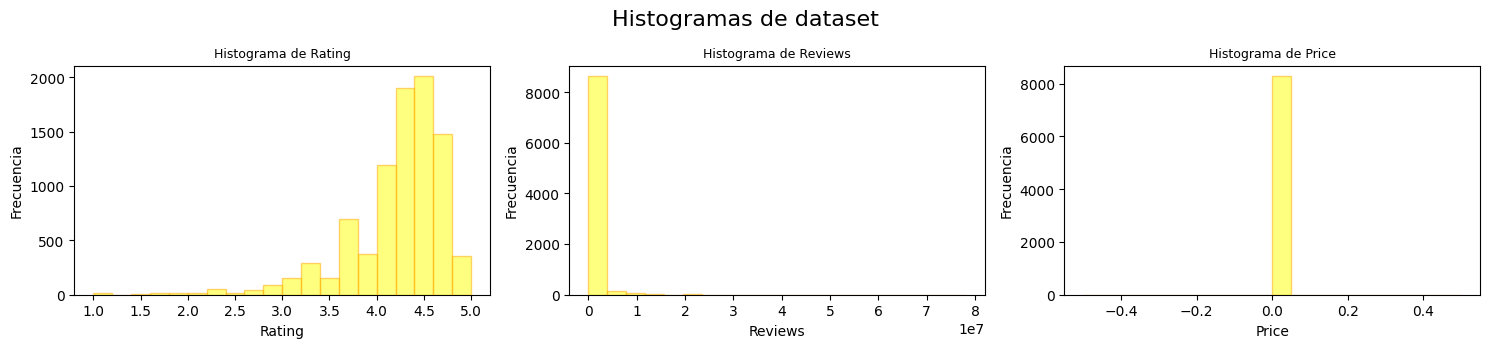

In [66]:
# Convertir las columnas a tipo numérico, forzando errores a NaN
google_no_dups_transformed['Rating'] = pd.to_numeric(google_no_dups_transformed['Rating'], errors='coerce')
google_no_dups_transformed['Reviews'] = pd.to_numeric(google_no_dups_transformed['Reviews'], errors='coerce')
google_no_dups_transformed['Price'] = pd.to_numeric(google_no_dups_transformed['Price'], errors='coerce')
# Seleccionar las columnas de interés
columnas = ['Rating', 'Reviews', 'Price']
google_dataset = google_no_dups_transformed[columnas]

# Histogramas de dataset con valores numéricos
num_cols = len(columnas)
num_rows = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))
axes = axes.flatten()
for i, column in enumerate(columnas):
    google_dataset[column].plot.hist(ax=axes[i], bins=20, alpha=0.5, color='yellow', edgecolor='orange')
    axes[i].set_title(f'Histograma de {column}', fontsize=9)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')
# Eliminar ejes vacíos si hay alguna subtrama no utilizada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.suptitle('Histogramas de dataset', fontsize=16)
plt.tight_layout()
plt.show()


Ninguno de los histogramas proporciona mucha información.

<ipython-input-67-52b1a97a40ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x="Category", data=google_no_dups_transformed, palette="Set1")
<ipython-input-67-52b1a97a40ca>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")


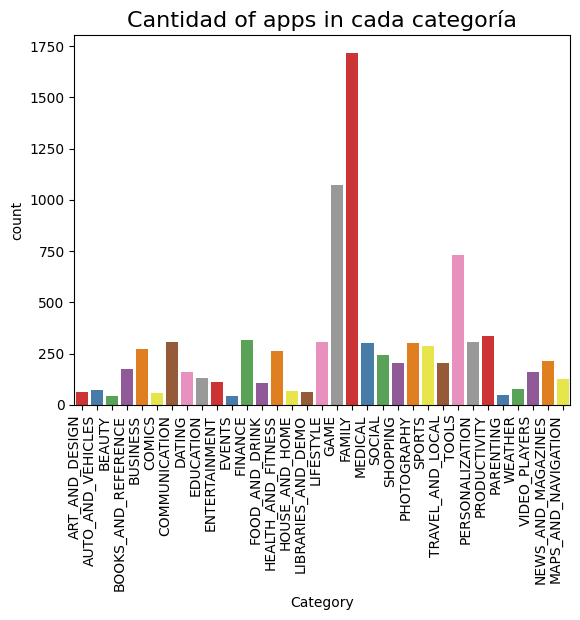

In [67]:
g = sns.countplot(x="Category", data=google_no_dups_transformed, palette="Set1")
# Ajustar las etiquetas en el eje x para que sean legibles
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad of apps in cada categoría', size=16)
plt.show()


La categoría más presente en el dataset es "Family", seguida por "Games" y "Personalization". Podría inferirse que éstas son las categorías con apps más descargadas.

<ipython-input-68-f1d51f6a1098>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x="Installs", data=google_no_dups_transformed, palette="Set3")
<ipython-input-68-f1d51f6a1098>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")


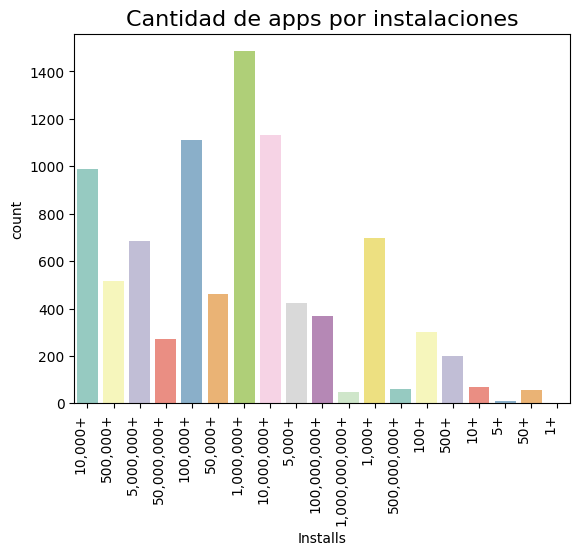

In [68]:
g = sns.countplot(x="Installs", data=google_no_dups_transformed, palette="Set3")
# Ajustar las etiquetas en el eje x para que sean legibles
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de apps por instalaciones', size=16)
plt.show()

La cantidad de instalaciones "más de 1 millón" es la más presente, por lo que puede considerarse un buen punto de referencia.

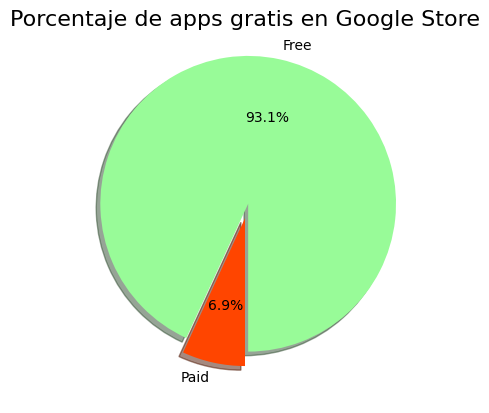

In [117]:
labels =google_no_dups_transformed['Type'].value_counts(sort = True).index
sizes = google_no_dups_transformed['Type'].value_counts(sort = True)
colors = ["palegreen","orangered"]
explode = (0.1,0)
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Porcentaje de apps gratis en Google Store',size = 16)
plt.show()

In [ ]:
def remove_outliers(df, columns):
    df_cleaned = df.copy()  # Hacer una copia del DataFrame para no modificar el original

    for column in columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            # Calcular Q1, Q3 e IQR
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            # Definir los límites para los outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filtrar los datos sin outliers
            df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

    return df_cleaned

# Nombres de las columnas para las que quieres eliminar outliers
columnas = ['Rating', 'Reviews']

# Eliminar outliers
google_dataset_cleaned = remove_outliers(google_dataset, columnas)

# Mostrar el DataFrame limpio
print("Dataset limpio sin outliers:")
print(google_dataset_cleaned.describe())

Dataset limpio sin outliers:
            Rating        Reviews
count  6837.000000    6837.000000
mean      4.249042   20153.561942
std       0.383977   36500.134385
min       3.300000       1.000000
25%       4.000000     116.000000
50%       4.300000    2067.000000
75%       4.500000   22503.000000
max       5.000000  177703.000000


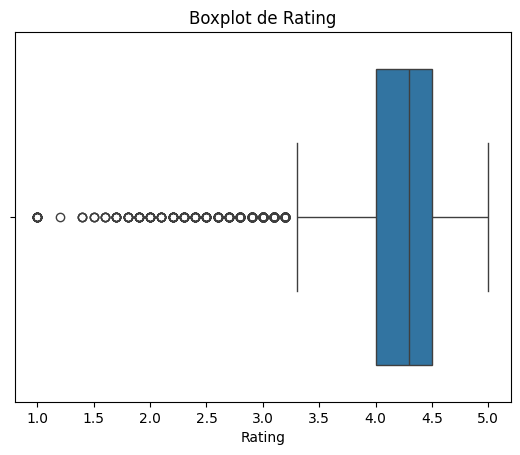

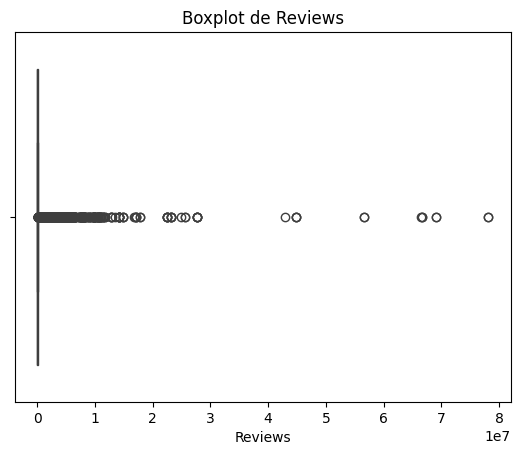

In [21]:
def plot_boxplot(df, columns):
    for column in columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            sns.boxplot(x=df[column])
            plt.title(f'Boxplot de {column}')
            plt.show()

df = google_no_dups_transformed
columnas = ['Rating', 'Reviews']
plot_boxplot(df, columnas)

In [23]:
#Eliminar outlier por IQR
def split_outliers(df, columns):
    df_with_outliers = df.copy()  # DataFrame para los outliers
    df_without_outliers = df.copy()  # DataFrame para los datos sin outliers

    for column in columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            # Calcular Q1, Q3 e IQR
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            # Definir los límites para los outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filtrar los outliers
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            df_with_outliers = pd.concat([df_with_outliers, outliers]).drop_duplicates()

            # Filtrar los datos sin outliers
            df_without_outliers = df_without_outliers[(df_without_outliers[column] >= lower_bound) & (df_without_outliers[column] <= upper_bound)]

    return df_with_outliers, df_without_outliers
# Nombres de las columnas para detectar outliers
columnas = ['Rating', 'Reviews']
# Dividir el dataset
df_with_outliers, df_without_outliers = split_outliers(google_no_dups_transformed, columnas)
# Mostrar tamaños de los DataFrames resultantes
print(f"Tamaño del DataFrame con outliers: {df_with_outliers.shape}")
print(f"Tamaño del DataFrame sin outliers: {df_without_outliers.shape}")

Tamaño del DataFrame con outliers: (8886, 13)
Tamaño del DataFrame sin outliers: (6837, 13)


Aunque los boxplots muestran presencia importante de outliers, si se limpian se pierden aproximadamente el %40 de los datos. El trabajo se continuó sin descartar los outliers.

Para tener una comprensión más detallada del mercado, se dividirá el dataset entre aplicaciones gratuitas y aplicaciones de pago.

In [69]:
free_apps_google = google_no_dups_transformed[google_no_dups_transformed['Type'] == "Free"]
paid_apps_google = google_no_dups_transformed[google_no_dups_transformed['Type'] == "Paid"]

print(f"Number of free apps: {len(free_apps_google)}")
print(f"Number of paid apps: {len(paid_apps_google)}")


Number of free apps: 8275
Number of paid apps: 611


#####Google Store - aplicaciones gratuitas

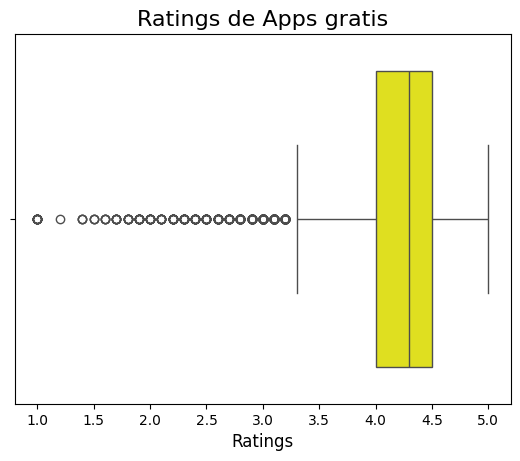

In [70]:
sns.boxplot(x=free_apps_google['Rating'], color="yellow")

plt.title('Ratings de Apps gratis', fontsize=16)
plt.xlabel('Ratings', fontsize=12)
plt.show()

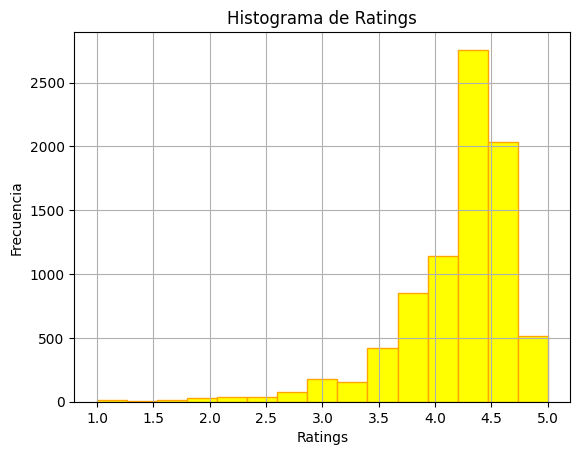

In [73]:
plt.hist(free_apps_google['Rating'], bins=15,color="yellow", edgecolor='orange')
plt.title('Histograma de Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

La variable Rating puede ser utilizada como métrica de éxito de una app. Se observa que el promedio se establece cercano a 4.5 de 5, con los outliers en los valores más bajos. El histograma muestra que la variable está sesgada a la izquierda.

<ipython-input-75-49d6a443fa76>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="Category",y="Rating",data=free_apps_google, kind="box", height = 6 ,


Text(0.5, 1.0, 'Boxplot of Rating VS Categoría')

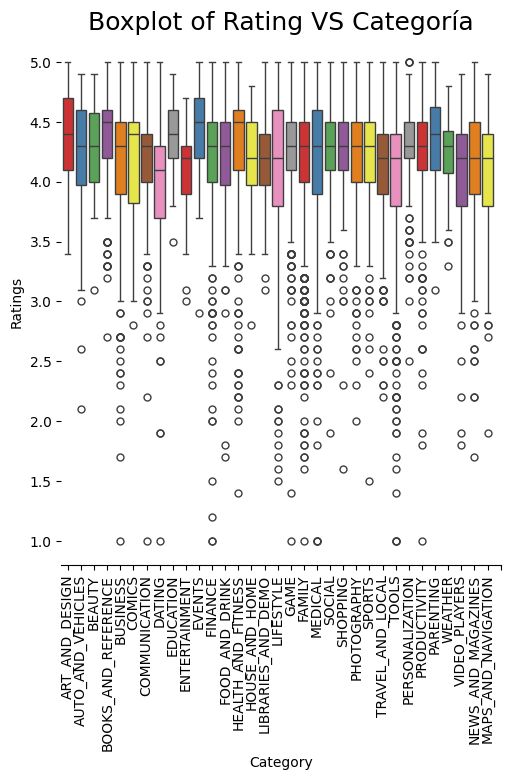

In [75]:
g = sns.catplot(x="Category",y="Rating",data=free_apps_google, kind="box", height = 6 ,
palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Ratings")
plt.title('Boxplot of Rating VS Categoría',size = 18)

Hay una gran cantidad de outliers, presentes en los valores más bajos de rating. Hay varias categorías de apps que presentan una distribución más regular (Social, Shopping, Photography).

<ipython-input-105-d70a13d5c855>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="Installs",y="Rating",data=free_apps_google, kind="box", height = 6 ,


Text(0.5, 1.0, 'Boxplot of Rating VS Instalaciones')

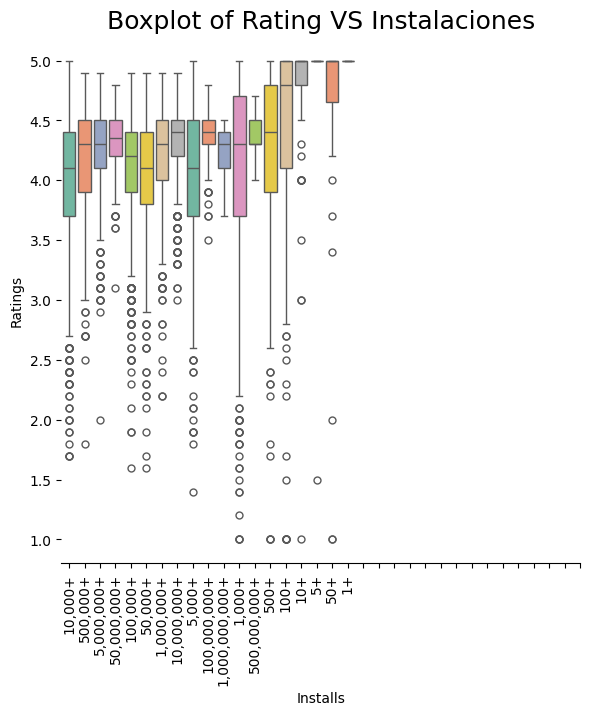

In [105]:
g = sns.catplot(x="Installs",y="Rating",data=free_apps_google, kind="box", height = 6 ,
palette = "Set2")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Ratings")
plt.title('Boxplot of Rating VS Instalaciones',size = 18)

Aquí sí se puede observar mayor variación en la distribución de los datos. Cabe destacar que la categoría "más de 1 millón" tiene una distribución más compacta.

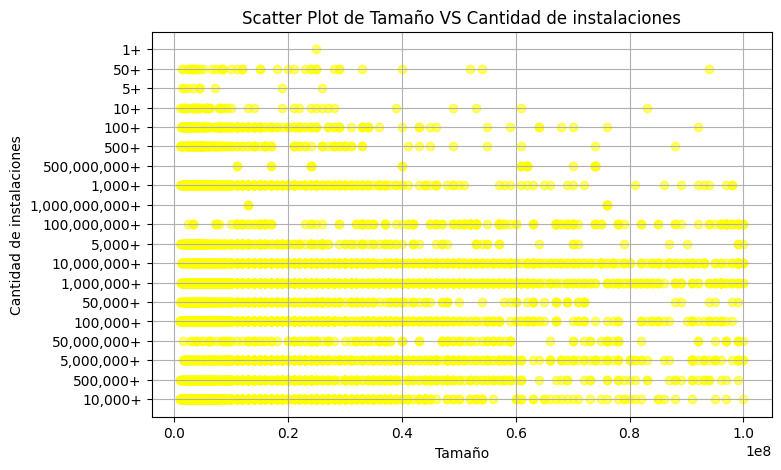

In [107]:
plt.figure(figsize=(8, 5))
plt.scatter(free_apps_google['Size'], free_apps_google['Installs'], color='yellow', alpha=0.6)

# Opcional: Agregar una línea de regresión
#sns.regplot(x='rating_count_tot', y='user_rating', data=free_apps_apple, scatter=False, color='orange')

plt.title('Scatter Plot de Tamaño VS Cantidad de instalaciones')
plt.xlabel('Tamaño')
plt.ylabel('Cantidad de instalaciones')
plt.grid(True)
plt.show()

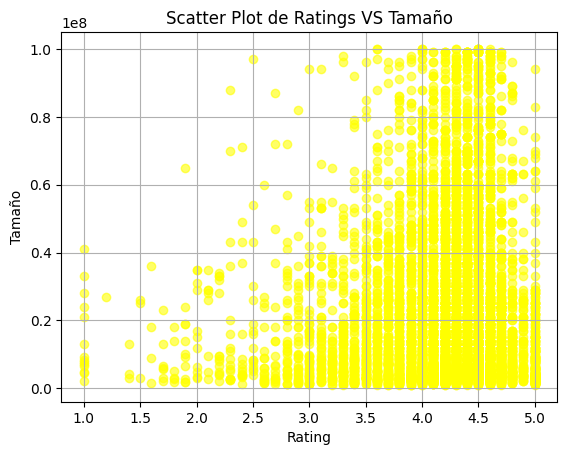

In [108]:
#plt.figure(figsize=(8, 5))
plt.scatter(free_apps_google['Rating'], free_apps_google['Size'], color='yellow', alpha=0.6)

# Opcional: Agregar una línea de regresión
#sns.regplot(x='rating_count_tot', y='user_rating', data=free_apps_apple, scatter=False, color='orange')

plt.title('Scatter Plot de Ratings VS Tamaño')
plt.xlabel('Rating')
plt.ylabel('Tamaño')
plt.grid(True)
plt.show()

Se observa que el tamaño impacta en la cantidad de instalaciones. Luego de los 40 Mb las instalaciones disminuyen; sólo se mantiene estable "más de 10 millones". En cambio no se observa influencia del tamaño respecto al Rating.

#####Google Store - aplicaciones pagas

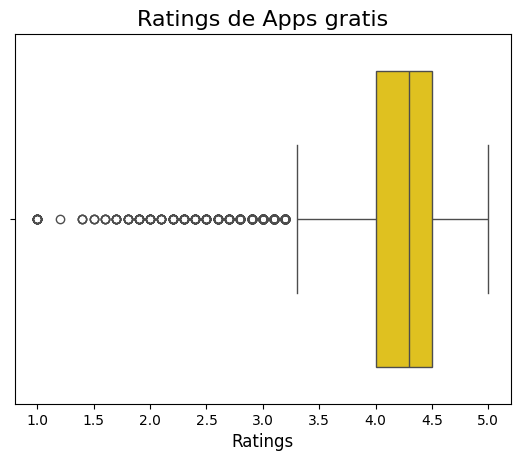

In [86]:
sns.boxplot(x=free_apps_google['Rating'], color="gold")

plt.title('Ratings de Apps gratis', fontsize=16)
plt.xlabel('Ratings', fontsize=12)
plt.show()

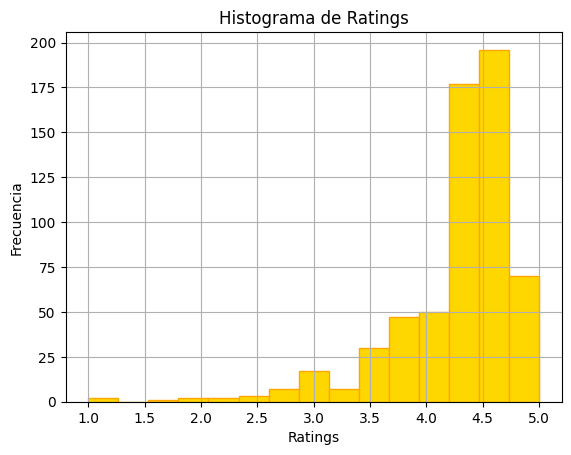

In [87]:
plt.hist(paid_apps_google['Rating'], bins=15,color="gold", edgecolor='orange')
plt.title('Histograma de Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Se mantienen las mismas observaciones que en las apps gratuitas repecto a la categoría Rating.

<ipython-input-89-8771e0348624>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="Category",y="Rating",data=paid_apps_google, kind="box", height = 6 ,


Text(0.5, 1.0, 'Boxplot of Rating VS Categoría')

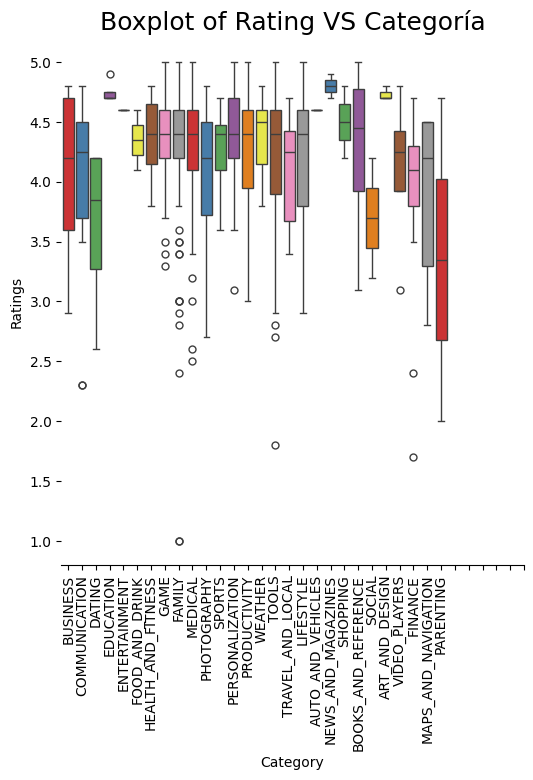

In [89]:
g = sns.catplot(x="Category",y="Rating",data=paid_apps_google, kind="box", height = 6 ,
palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Ratings")
plt.title('Boxplot of Rating VS Categoría',size = 18)

Se observa una mayor variación en la distribución de datos en las categorías asignadas.

<ipython-input-109-c89fec6d7781>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="Installs",y="Rating",data=paid_apps_google, kind="box", height = 6 ,


Text(0.5, 1.0, 'Boxplot of Rating VS Instalaciones')

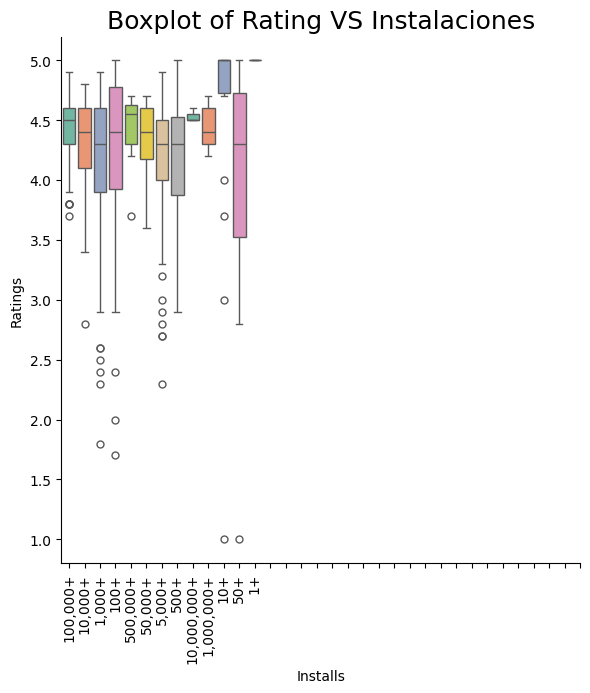

In [109]:
g = sns.catplot(x="Installs",y="Rating",data=paid_apps_google, kind="box", height = 6 ,
palette = "Set2")
#g.despine(left=False)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Ratings")
plt.title('Boxplot of Rating VS Instalaciones',size = 18)

Hay una mayor variación en la distribución de los datos; las variables correspondientes a menor cantidad de descargas muestran una menor variación que el resto.

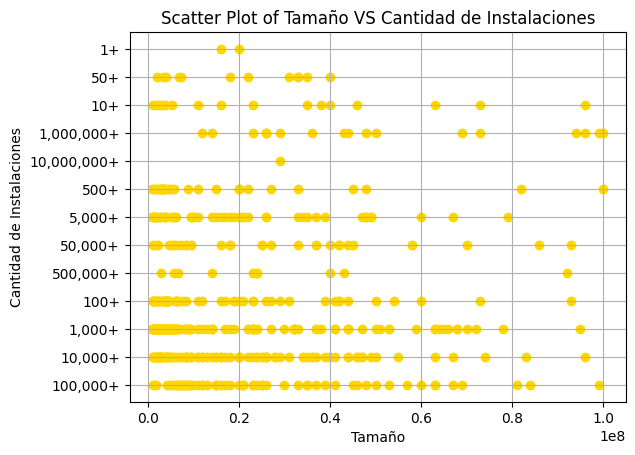

In [111]:
#plt.figure(figsize=(8, 5))
plt.scatter(paid_apps_google['Size'], paid_apps_google['Installs'], color='gold')

# Opcional: Agregar una línea de regresión
#sns.regplot(x='rating_count_tot', y='user_rating', data=free_apps_apple, scatter=False, color='orange')

plt.title('Scatter Plot of Tamaño VS Cantidad de Instalaciones')
plt.xlabel('Tamaño')
plt.ylabel('Cantidad de Instalaciones')
plt.grid(True)
plt.show()

Se observa una vez más que la mayoría de las instalaciones tienen un valor inferior a 40 Mb. Una gran diferencia es que la variable "más de 10 millones" casi no tiene datos, lo opuesto a el set de apps gratuitas.

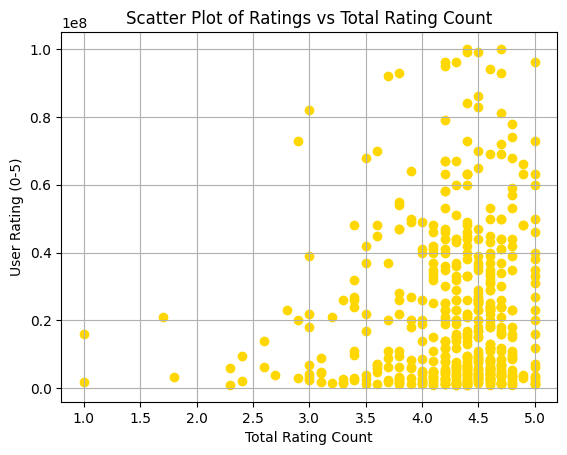

In [101]:
#plt.figure(figsize=(8, 5))
plt.scatter(paid_apps_google['Rating'], paid_apps_google['Size'], color='gold')

# Opcional: Agregar una línea de regresión
#sns.regplot(x='rating_count_tot', y='user_rating', data=free_apps_apple, scatter=False, color='orange')

plt.title('Scatter Plot of Ratings vs Total Rating Count')
plt.xlabel('Total Rating Count')
plt.ylabel('User Rating (0-5)')
plt.grid(True)
plt.show()

Se mantiene lo observado en el set de apps gratuitas.

####Apple App Store

In [24]:
print("Estadística descriptiva")
apple_no_dups.describe()

Estadística descriptiva


,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


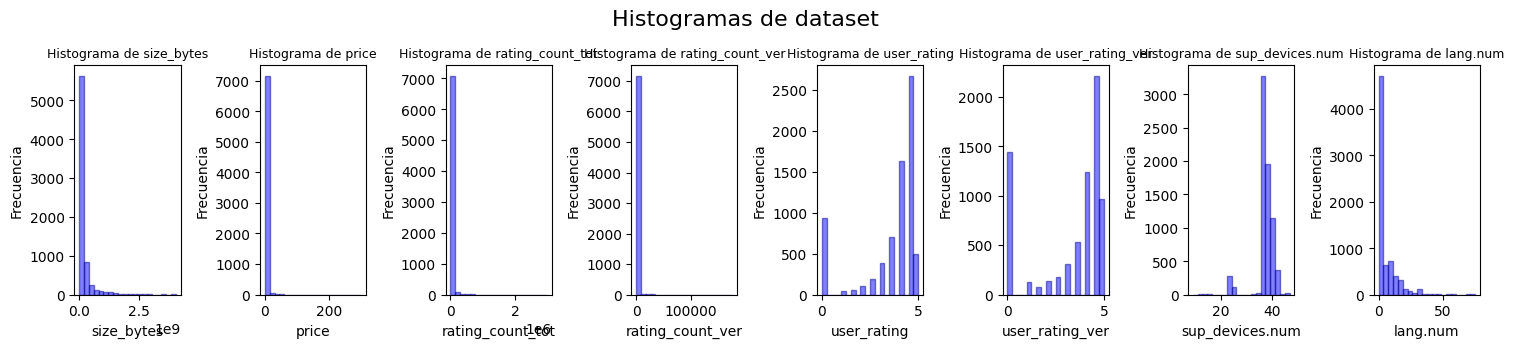

In [25]:
columnas = ['size_bytes', 'price','rating_count_tot','rating_count_ver','user_rating','user_rating_ver','sup_devices.num','lang.num']
apple_dataset = apple_no_dups[columnas]

# Histogramas de dataset con valores ausentes
num_cols = len(columnas)

# Asumimos 2 filas para ajustar todos los histogramas
num_rows = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))
axes = axes.flatten()

for i, column in enumerate(columnas):
    apple_dataset[column].plot.hist(ax=axes[i], bins=20, alpha=0.5, color='blue', edgecolor='darkblue')
    axes[i].set_title(f'Histograma de {column}', fontsize = 9)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')

# Eliminar ejes vacíos si hay alguna subtrama no utilizada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Histogramas de dataset', fontsize=16)

plt.tight_layout()
plt.show()

Los histogramas no presentan mucha información; las categorías Rating y Cantidad de Ratings están sesgados hacia la izquierda.

<ipython-input-26-2f94185b4ba8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x="prime_genre", data=apple_no_dups, palette="Set2")
<ipython-input-26-2f94185b4ba8>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")


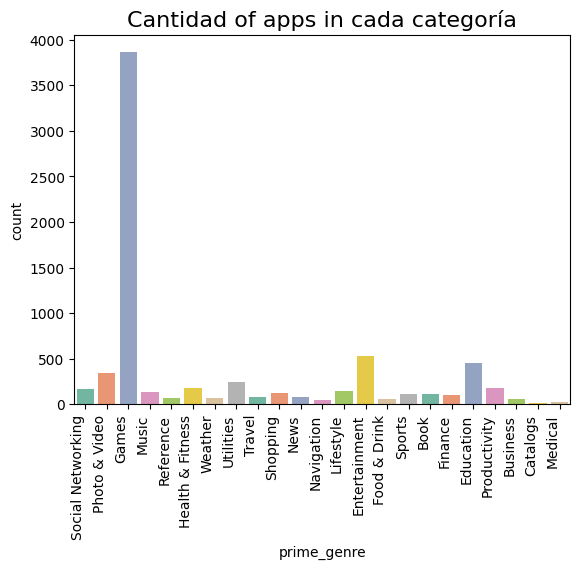

In [26]:
# Supongamos que data es tu DataFrame y 'Category' es la columna que quieres graficar
g = sns.countplot(x="prime_genre", data=apple_no_dups, palette="Set2")

# Ajustar las etiquetas en el eje x para que sean legibles
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")

# Añadir título al gráfico
plt.title('Cantidad of apps in cada categoría', size=16)

# Mostrar el gráfico
plt.show()

Se observa que el género de app más presente es Juegos. Se puede inferir por su mayor presencia que es el tipo de app más descargado.

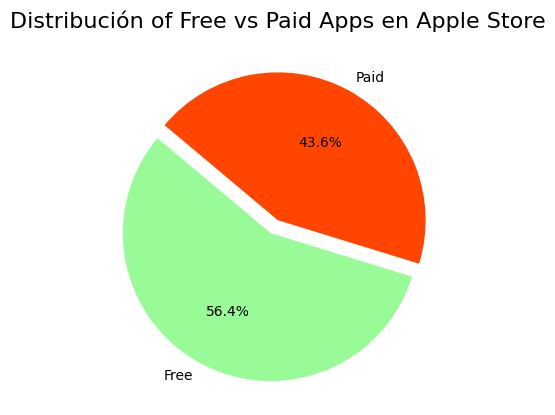

In [118]:
# Categorize apps into "Free" and "Paid" based on the 'price' column
free_paid_counts = apple_no_dups['price'].apply(lambda x: 'Free' if x == 0 else 'Paid').value_counts()

# Plotting the pie chart
#plt.figure(figsize=(8, 8))
colors = ['palegreen', 'orangered']
plt.pie(free_paid_counts, labels=free_paid_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0.1, 0))

plt.title('Distribución of Free vs Paid Apps en Apple Store', size= 16)
plt.show()


Aquí se observa una mayor paridad entre cantidad de apps gratuitas y de pago si se compara con el set de la tienda de Google.

In [28]:
# Supongamos que subset_dataset es tu DataFrame con las columnas numéricas
def remove_outliers(df, columns):
    df_cleaned = df.copy()  # Hacer una copia del DataFrame para no modificar el original

    for column in columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            # Calcular Q1, Q3 e IQR
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            # Definir los límites para los outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filtrar los datos sin outliers
            df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

    return df_cleaned

# Nombres de las columnas para las que quieres eliminar outliers
columnas = ['size_bytes', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'sup_devices.num', 'lang.num']

# Eliminar outliers
subset_dataset_cleaned = remove_outliers(apple_dataset, columnas)

# Mostrar el DataFrame limpio
print("Dataset limpio sin outliers:")
print(subset_dataset_cleaned.describe())


Dataset limpio sin outliers:
         size_bytes        price  rating_count_tot  rating_count_ver  \
count  2.446000e+03  2446.000000       2446.000000       2446.000000   
mean   1.044045e+08     0.882845        785.713410         43.289861   
std    8.112985e+07     1.265762       1295.526512         67.897660   
min    6.184960e+05     0.000000          1.000000          0.000000   
25%    4.246477e+07     0.000000         43.000000          2.000000   
50%    8.537754e+07     0.000000        203.000000         12.000000   
75%    1.413294e+08     1.990000        888.000000         53.000000   
max    3.770040e+08     3.990000       6879.000000        346.000000   

       user_rating  user_rating_ver  sup_devices.num     lang.num  
count  2446.000000      2446.000000      2446.000000  2446.000000  
mean      3.990801         3.470973        37.368357     3.812347  
std       0.709573         1.631231         0.493355     4.516675  
min       2.000000         0.000000        36.0000

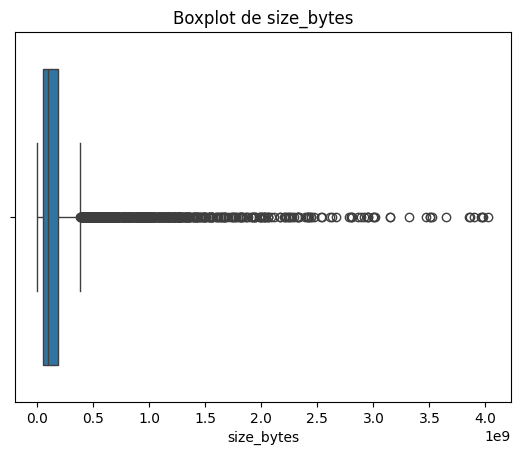

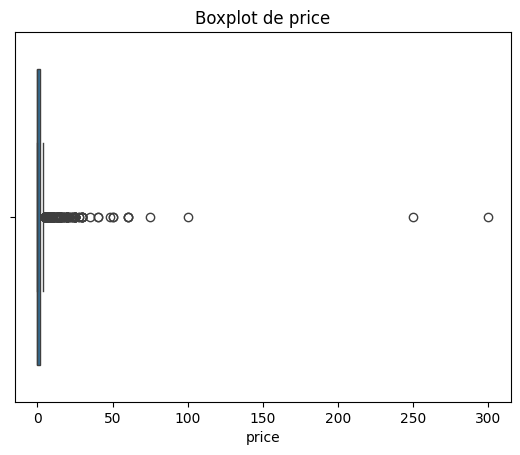

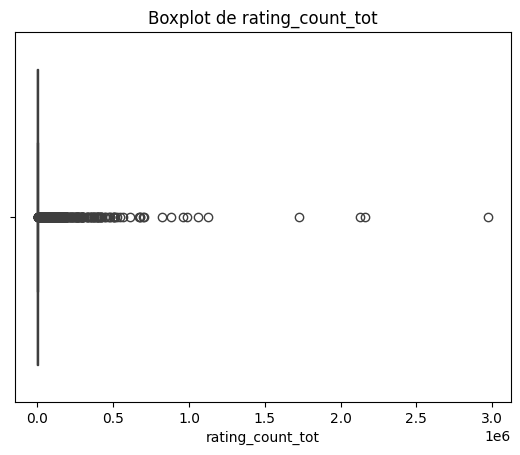

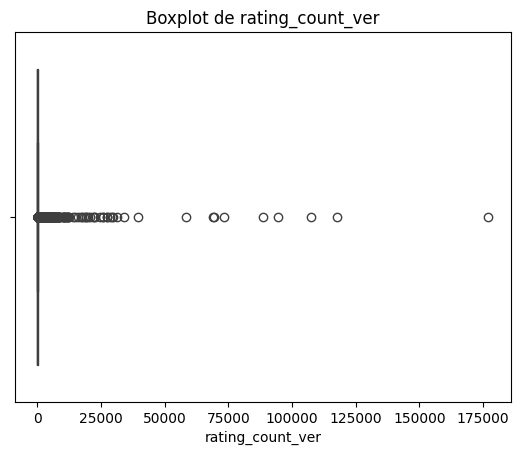

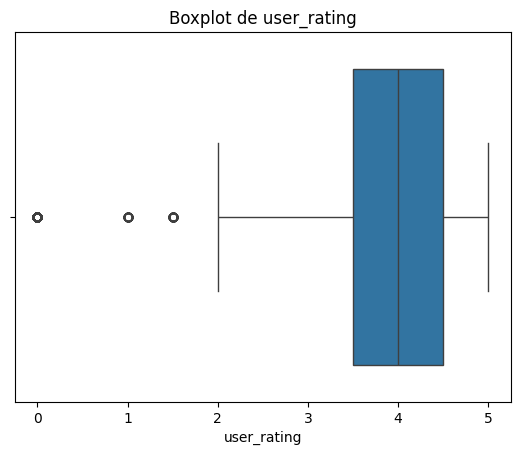

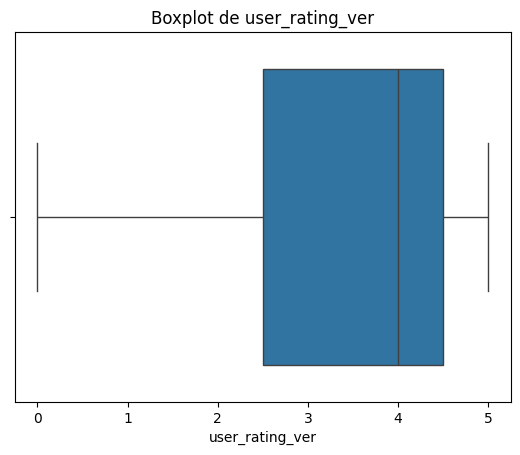

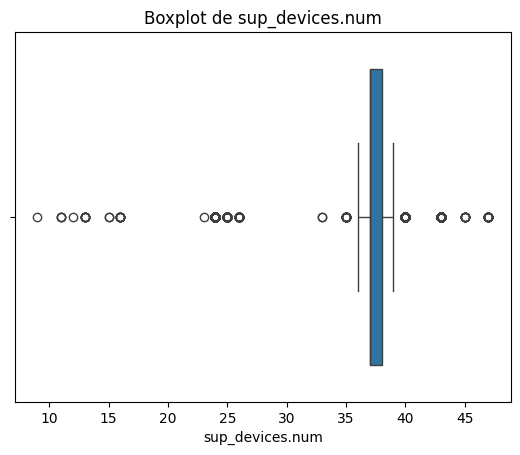

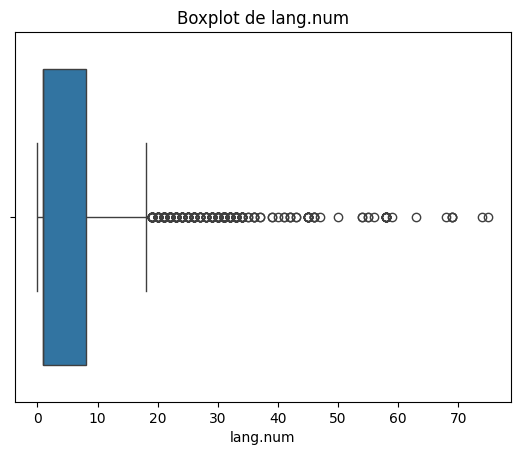

In [29]:
def plot_boxplot(df, columns):
    for column in columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            sns.boxplot(x=df[column])
            plt.title(f'Boxplot de {column}')
            plt.show()

df = apple_no_dups
columnas = ['size_bytes', 'price','rating_count_tot','rating_count_ver','user_rating','user_rating_ver','sup_devices.num','lang.num']
plot_boxplot(df, columnas)

Existen varios outliers en todas las variables numéricas. Se van a subsetear en otro dataset para potenciales análisis futuros.

In [30]:
def split_outliers(df, columns):
    df_with_outliers = df.copy()  # DataFrame para los outliers
    df_without_outliers = df.copy()  # DataFrame para los datos sin outliers

    for column in columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            # Calcular Q1, Q3 e IQR
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            # Definir los límites para los outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filtrar los outliers
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            df_with_outliers = pd.concat([df_with_outliers, outliers]).drop_duplicates()

            # Filtrar los datos sin outliers
            df_without_outliers = df_without_outliers[(df_without_outliers[column] >= lower_bound) & (df_without_outliers[column] <= upper_bound)]

    return df_with_outliers, df_without_outliers

# Nombres de las columnas para detectar outliers
columnas = ['size_bytes', 'price','rating_count_tot','rating_count_ver','user_rating','user_rating_ver','sup_devices.num','lang.num']

# Dividir el dataset
df_with_outliers, df_without_outliers = split_outliers(apple_no_dups, columnas)

# Mostrar tamaños de los DataFrames resultantes
print(f"Tamaño del DataFrame con outliers: {df_with_outliers.shape}")
print(f"Tamaño del DataFrame sin outliers: {df_without_outliers.shape}")

Tamaño del DataFrame con outliers: (7197, 16)
Tamaño del DataFrame sin outliers: (2446, 16)


En este dataset se pierde aún más datos si se eliminan los outliers. Por ello y para mantener la metodología se trabajó manteniendo los outliers.

Se dividio el dataset en dos sets, uno de apps gratuitas y otro de apps de pagos.  

In [32]:
# Subsetting the dataset for "free" apps (Price = 0)
free_apps_apple = apple_no_dups[apple_no_dups['price'] == 0]

# Subsetting the dataset for "paid" apps (Price > 0)
paid_apps_apple = apple_no_dups[apple_no_dups['price'] > 0]

# Display the number of rows in each subset
print(f"Number of free apps: {len(free_apps_apple)}")
print(f"Number of paid apps: {len(paid_apps_apple)}")



Number of free apps: 4056
Number of paid apps: 3141


#####Apple Store - aplicaciones gratuitas



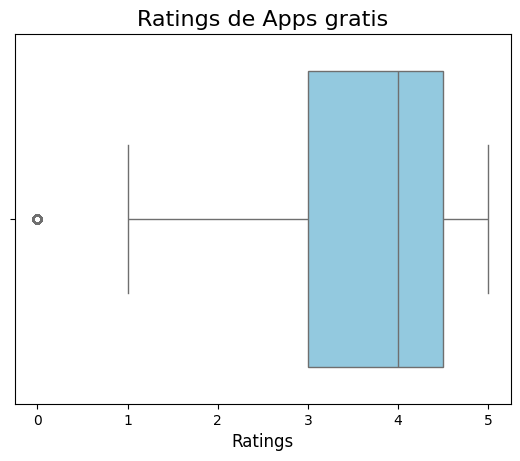

In [33]:
sns.boxplot(x=free_apps_apple['user_rating'], color="skyblue")

plt.title('Ratings de Apps gratis', fontsize=16)
plt.xlabel('Ratings', fontsize=12)
plt.show()

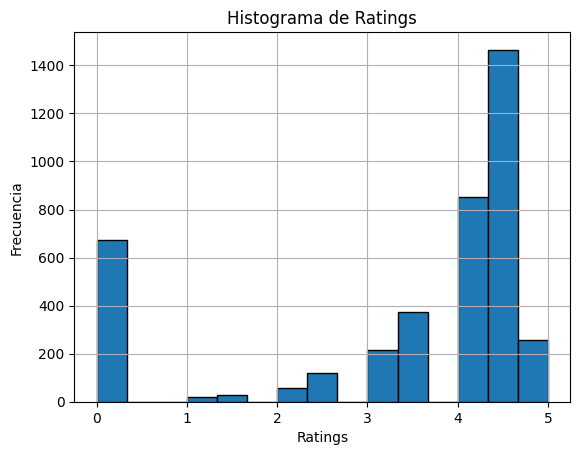

In [34]:
plt.hist(free_apps_apple['user_rating'], bins=15, edgecolor='black')
plt.title('Histograma de Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

En la categoría Rating casi no existen outliers pero con una distribución similar a la de la tienda de Google, aunque el promedio disminuye a 4 de 5. El histograma presenta que los valores de Rating se concentran en valores entre 4 y 5, y valores cercanos a 0.

<ipython-input-53-36b07987370f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="prime_genre",y="user_rating",data=free_apps_apple, kind="box", height = 6 ,


Text(0.5, 1.0, 'Boxplot of Rating VS Categoría')

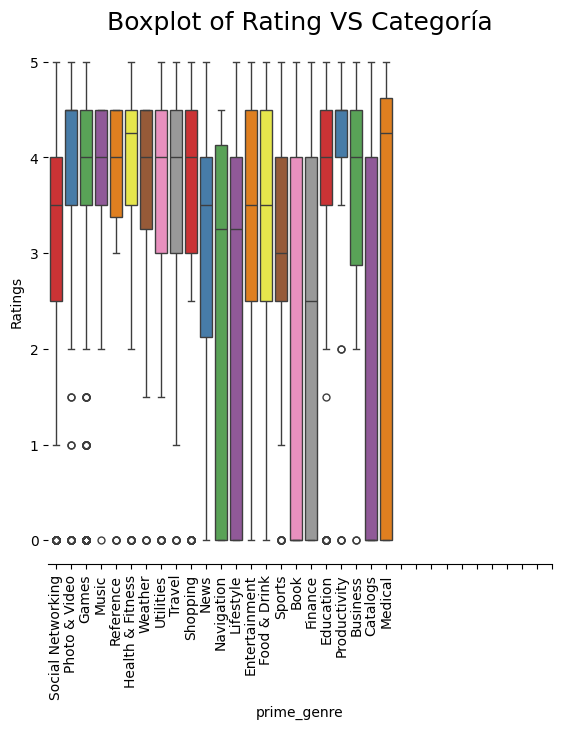

In [53]:
g = sns.catplot(x="prime_genre",y="user_rating",data=free_apps_apple, kind="box", height = 6 ,
palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Ratings")
plt.title('Boxplot of Rating VS Categoría',size = 18)

Se observan menos cantidad de outliers, pero una distribución de datos mucho más amplia. Music, Games y Education parecerían ser los de menos variación.

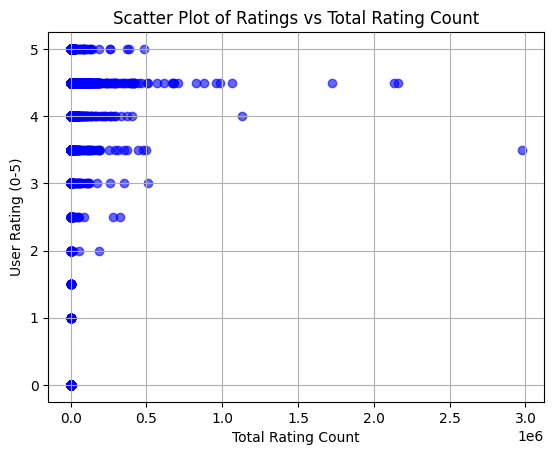

In [62]:
#plt.figure(figsize=(8, 5))
plt.scatter(free_apps_apple['rating_count_tot'], free_apps_apple['user_rating'], color='blue', alpha=0.6)

plt.title('Scatter Plot of Ratings vs Total Rating Count')
plt.xlabel('Total Rating Count')
plt.ylabel('User Rating (0-5)')
plt.grid(True)
plt.show()


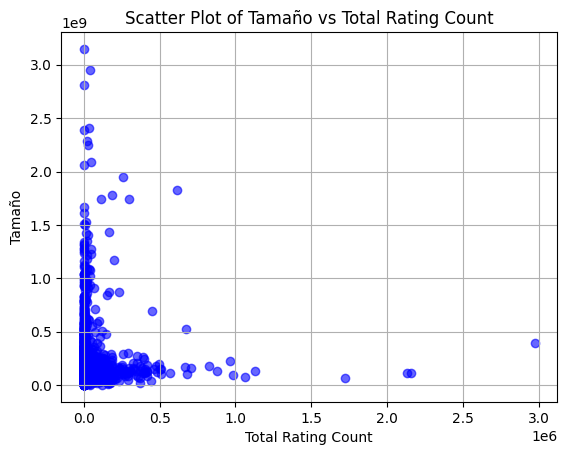

In [112]:
#plt.figure(figsize=(8, 5))
plt.scatter(free_apps_apple['rating_count_tot'], free_apps_apple['size_bytes'], color='blue', alpha=0.6)
plt.title('Scatter Plot of Tamaño vs Total Rating Count')
plt.xlabel('Total Rating Count')
plt.ylabel('Tamaño')
plt.grid(True)
plt.show()

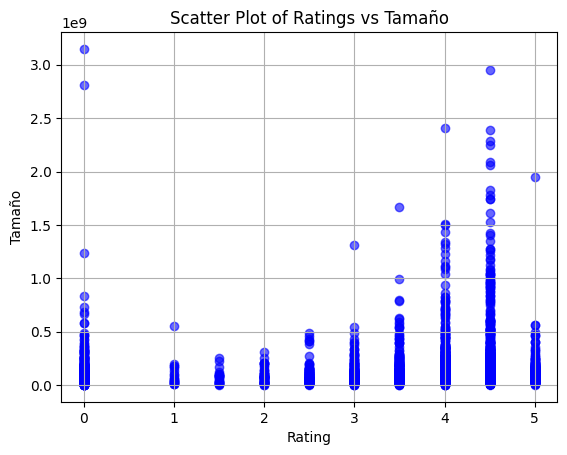

In [113]:
#plt.figure(figsize=(8, 5))
plt.scatter(free_apps_apple['user_rating'], free_apps_apple['size_bytes'], color='blue', alpha=0.6)

# Opcional: Agregar una línea de regresión
#sns.regplot(x='rating_count_tot', y='user_rating', data=free_apps_apple, scatter=False, color='orange')

plt.title('Scatter Plot of Ratings vs Tamaño')
plt.xlabel('Rating')
plt.ylabel('Tamaño')
plt.grid(True)
plt.show()

#####Apple Store - aplicaciones pagas

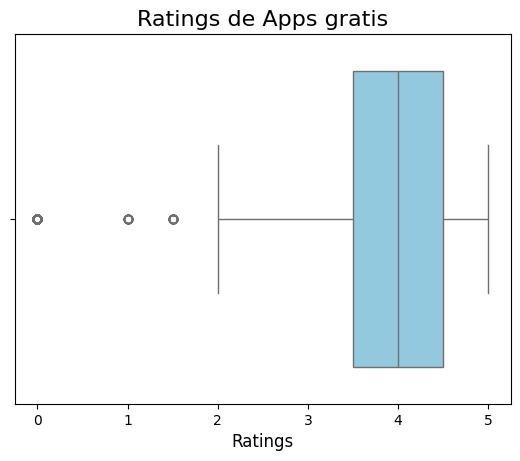

In [54]:
sns.boxplot(x=paid_apps_apple['user_rating'], color="skyblue")

plt.title('Ratings de Apps gratis', fontsize=16)
plt.xlabel('Ratings', fontsize=12)
plt.show()

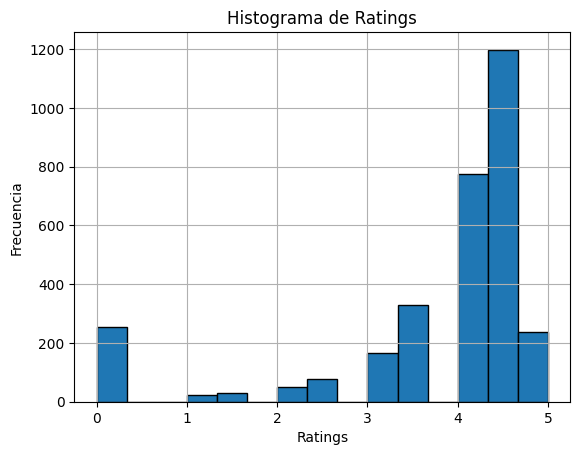

In [55]:
plt.hist(paid_apps_apple['user_rating'], bins=15, edgecolor='black')
plt.title('Histograma de Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

<ipython-input-59-51440142f2c5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="prime_genre",y="user_rating",data=paid_apps_apple, kind="box", height = 6 ,


Text(0.5, 1.0, 'Boxplot of Rating VS Categoría')

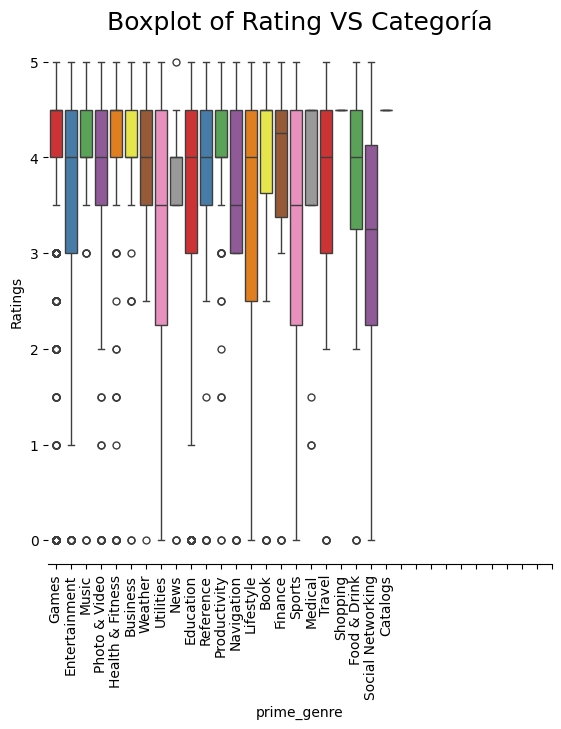

In [59]:
g = sns.catplot(x="prime_genre",y="user_rating",data=paid_apps_apple, kind="box", height = 6 ,
palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Ratings")
plt.title('Boxplot of Rating VS Categoría',size = 18)

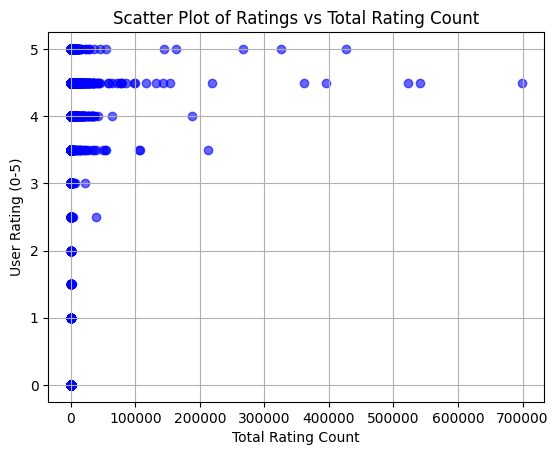

In [115]:
#plt.figure(figsize=(8, 5))
plt.scatter(paid_apps_apple['rating_count_tot'], paid_apps_apple['user_rating'], color='blue', alpha=0.6)
plt.title('Scatter Plot of Ratings vs Total Rating Count')
plt.xlabel('Total Rating Count')
plt.ylabel('User Rating (0-5)')
plt.grid(True)
plt.show()


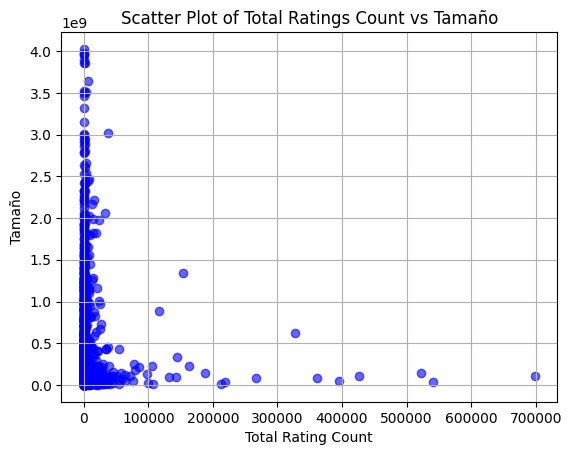

In [114]:
#plt.figure(figsize=(8, 5))
plt.scatter(paid_apps_apple['rating_count_tot'], paid_apps_apple['size_bytes'], color='blue', alpha=0.6)
plt.title('Scatter Plot of Total Ratings Count vs Tamaño')
plt.xlabel('Total Rating Count')
plt.ylabel('Tamaño')
plt.grid(True)
plt.show()

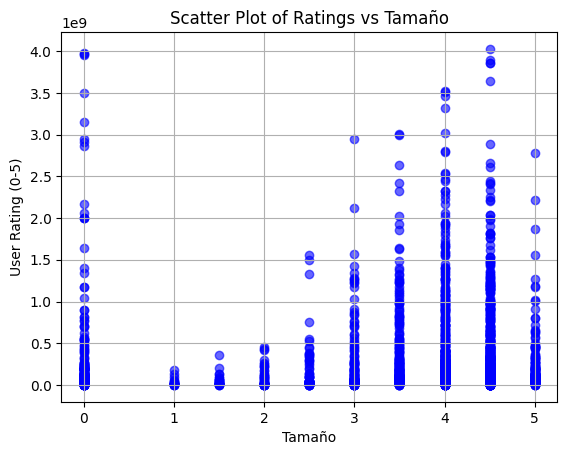

In [116]:
#plt.figure(figsize=(8, 5))
plt.scatter(paid_apps_apple['user_rating'], paid_apps_apple['size_bytes'], color='blue', alpha=0.6)
plt.title('Scatter Plot of Ratings vs Tamaño')
plt.xlabel('Tamaño')
plt.ylabel('User Rating (0-5)')
plt.grid(True)
plt.show()

##Primeras conclusiones
- Se pudo hacer una limpieza satisfactoria de ambos datasets.
- Uno de los métodos más usados para eliminar outliers, IQR, eliminan mayoría de las entradas de los datasets. Se podrían probar otros métodos para tener datasets más limpios y sin tanta pérdida de datos.
- Google Store tiene su gran mayoría de apps gratuitas, mientas que Apple Store tiene una distribución más equitativa en cantidades de apps gratis y de pago.
- Ambas tiendas tienen promedio de ratings de usuario muy similares: 4 de 5 en Apple y ~4.3 en Google.
- No hay datos de cantidad de descargas en el dataset de Apple; tuvieron que ser inferidos desde la cantidad de ratings de usuarios pero es una ausencia importante a la hora de comparar ambas tiendas.
- Las categorías más populares en Google son Family y Games. En Apple es Games.
- No se observan grandes diferencias entre apps gratuitas y de pago ni en Google Store ni en Apple Store.